In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://shahaab-co.ir/mag/wp-content/uploads/2019/05/dnn-activation-function-14.png")

In [2]:
Image(url = "https://www.henryailabs.com/ArticlePictures/3-4-19-4.jpg")

In [3]:
# import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 1 - Sigmoid
def sigmoid(x):
    s = (1 / (1 +  np.exp(-1 * x)))
    return s

In [5]:
# 2 - Tanh
def tanh(x):
    t = np.tanh(x)
    return t

In [6]:
# 3 - ReLU
def relu(x):
    r =  np.maximum(0,x)   
    return r

In [7]:
#4 - Leaky ReLU
def leaky_relu(x, alpha=0.01):
    """
    Compute the leaky ReLU of x
    
    Arguments: X -- A scalar or numpy array of any size
               α -- Activation slope when x < 0. Default is 0.01
               The hyperparameter α defines how much the function leaks
    Return:
    lrelu -- leaky_relu(x)
    """
    lrelu = np.where(x > 0, x, x * alpha)                  
    return lrelu

In [8]:
# 5 - Softmax
# see this https://cs231n.github.io/linear-classify/#softmax
# (this implementation is numerically stable)
def softmax(x):
    z = x - np.max(x, axis=x.ndim - 1, keepdims=True)
    return np.exp(z) / np.sum(np.exp(z), axis=x.ndim - 1, keepdims=True)

In [9]:
# 6 - ELU
def elu(x, alpha=2):
    e = np.where(x < 0, alpha * (np.exp(x) - 1), x)
    return e

In [10]:
# 7 - SELU
def selu(x, alpha=1.6732632423543772848170429916717, lamb=1.0507009873554804934193349852946):
    return np.where(x < 0, lamb * alpha * (np.exp(x) - 1), x)

In [11]:
# 8 - Maxout
# https://cs231n.github.io/neural-networks-1/ look for "maxout"
# Assuming k = 2
def maxout(x, W1, b1, W2, b2):
    return np.maximum(np.dot(x, W1) + b1, np.dot(x, W2) + b2)

In [12]:
# create a test matrix
mmatrix= np.array([[1,2,3],[4,5,6]])

In [13]:
# test sigmoid
def test_sigmoid(x):
    sigmoid_ans = sigmoid(x)
    expected_ans = np.array([[0.73105858, 0.88079708, 0.95257413],
       [0.98201379, 0.99330715, 0.99752738]])
    assert np.allclose(sigmoid_ans, expected_ans)
    
test_sigmoid(mmatrix)

In [14]:
# test tanh
def test_tanh(x):
    ans = tanh(x)
    expected_ans = np.array([[0.761594155, 0.964027580, 0.99505475], [0.99932929, 0.999909, 0.999987]])
    assert np.allclose(ans, expected_ans)
    
test_tanh(mmatrix)

In [15]:
# test relu
relu_test_matrix = np.array([[-1, 2.5], [3, -0.2]])
def test_relu(x):
    ans =  relu(x)
    expected = np.array([[0, 2.5], [3, 0]])
    assert np.allclose(expected, ans)
    
test_relu(relu_test_matrix)

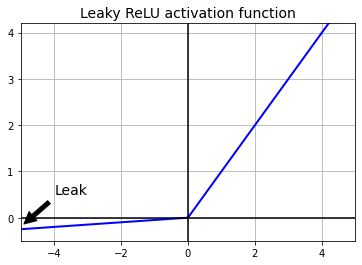

In [16]:
# test leaky relu and plot it
leaky_test_matrix = np.array([[-1, 2], [3, 0]])
def test_leaky_relu(x):
    ans = leaky_relu(x)
    expected_ans = np.array([[-0.01, 2], [3, 0]])
    assert np.allclose(ans, expected_ans)
    
test_leaky_relu(leaky_test_matrix)

#plot leaky relu
z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.savefig("leaky_relu_plot")
plt.show()

In [17]:
# test softmax
def test_softmax(x):
    ans = softmax(x)
    expected_ans =  np.array([[0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096]])
    assert np.allclose(ans, expected_ans)
test_softmax(mmatrix)

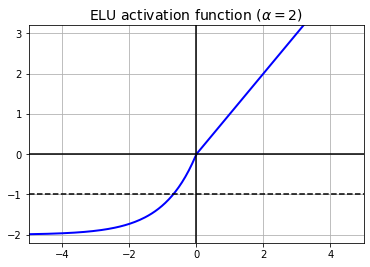

In [18]:
# test elu and plot it
elu_test_matrix = np.array([[-1, 2], [3, -0.5]])
def test_elu(x):
    ans = elu(x)
    expected_ans = np.array([[-1.264241, 2.], [3., -0.786938]])
    assert np.allclose(expected_ans, ans)
test_elu(elu_test_matrix)

z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z, 2), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=2$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.savefig("elu_plot")
plt.show()

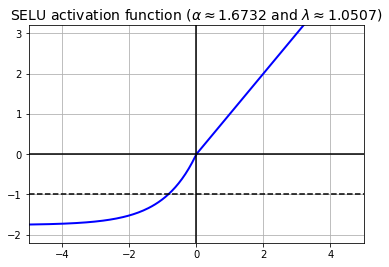

In [19]:
# test selu and plot it
selu_test_matrix = np.array([[-1, 2], [3, -0.5]])
def test_selu(x):
    ans = selu(x)
    expected_ans = np.array([[-1.11133, 2.], [3., -0.691758]])
    assert np.allclose(ans, expected_ans)
    
test_selu(selu_test_matrix)

z = np.linspace(-5, 5, 200)
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"SELU activation function ($\alpha \approx 1.6732$ and $\lambda \approx 1.0507$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.savefig("selu_plot")
plt.show()

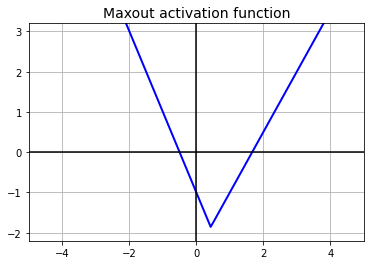

result of maxout:  [[ 5. ]
 [15.5]]


In [20]:
# maxout test and plot
m = 4
W1 = np.array([-2])
W2 = np.array([1.5])
b1 = np.array([-1])
b2 = np.array([-2.5])
x = np.linspace(-5, 5, 200).reshape(200, 1) # 200 [1*1]
ans = maxout(x=x, W1=W1, b1=b1, W2=W2, b2=b2)
plt.plot(x, ans, "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"Maxout activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.savefig("maxout_plot with two linear models")
plt.show()

def test_maxout():
    z = np.array([[1, 2, 3], [6, 3, 1]])
    W1 = np.array([[-2], [-1], [1]])
    W2 = np.array([[1.5], [3], [0]])
    b1 = np.array([-1])
    b2 = np.array([-2.5])
    ans = maxout(z, W1=W1, b1=b1, W2=W2, b2=b2)
    print("result of maxout: ", ans)
test_maxout()
